# ETL DEL DATASET USER REVIEWS

#### Importar librerías

In [37]:
#proporciona funcionalidades para trabajar con archivos comprimidos en el formato gzip (.gz)
import gzip

#se usará para para evaluar cada línea del archivo como una expresión de Python
#lo que permite cargar datos que no están en formato JSON.
import ast 

# Análisis de datos tabulares
import pandas as pd

# NumPy proporciona soporte para arreglos y matrices multidimensionales
import numpy as np

# Librería para crear gráficos
import matplotlib.pyplot as plt

#proporciona herramientas para trabajar con datos en formato JSON
import json 

# Detectar el idioma en el que está escrito un texto
from langdetect import detect

# Procesamiento del lenguaje natural (NLP)
import nltk

# SentimentIntensityAnalyzer es una herramienta en NLTK para análisis de sentimientos
from nltk.sentiment import SentimentIntensityAnalyzer

##### 1. Cargar y descomprimir el dataset

In [2]:
data = []
with gzip.open('user_reviews.json.gz', 'rb') as f:
    for line in f:
        data.append(ast.literal_eval(line.decode('utf-8')))
        # *  = (json.loads(line)) 
        # ** = (ast.literal_eval(line.decode('utf-8'))) esta opcion porque no es json 
user_reviews = pd.DataFrame(data)
f.close()

##### 2. Explorar el dataset

Al explorar el dataset se evidencia que la columna "reviews" contiene datos semiestructurados que deben ser desanidados y cada uno de esos elementos, debe tener su propia columna. 

In [3]:
user_reviews.info()
user_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


##### 3. Limpiar y desanidar columnas del dataset

In [4]:
# Desanidamos la columna 'reviews' y guardamos el dataset en la variable "df_user_reviews"
df_user_reviews = pd.json_normalize(data, record_path=['reviews'], meta=['user_id','user_url'])

In [5]:
#Revisamos el tipo de objeto que contine cada columna desanidada y la cantidad
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
 8   user_url     59305 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.7+ MB


In [6]:
df_user_reviews

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637
...,...,...,...,...,...,...,...,...,...
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley,http://steamcommunity.com/id/LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley,http://steamcommunity.com/id/LydiaMorley


In [7]:
# Lista con el orden deseado de las columnas
column_order = ['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']


# Reordena las columnas del DataFrame
df_user_reviews = df_user_reviews[column_order]

In [8]:
df_user_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [9]:
#Verificamos nuevamente si el dataframe tiene valores nulos
if df_user_reviews.isnull().any().any():
    print("El DataFrame tiene valores nulos.")
else:
    print("El DataFrame no tiene valores nulos.")

El DataFrame no tiene valores nulos.


In [10]:
#Evaluamos la cantidad de recomendaciones realizadas
df_user_reviews['recommend'].value_counts()

recommend
True     52473
False     6832
Name: count, dtype: int64

In [11]:
# Se eliminan las columnas no indispensables
df_user_reviews.drop(["helpful","user_url","last_edited"], axis=1, inplace=True)

C:\Users\FRANK\AppData\Local\Temp\ipykernel_8172\911660361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews.drop(["helpful","user_url","last_edited"], axis=1, inplace=True)


In [12]:
df_user_reviews.head()

,user_id,funny,posted,item_id,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...


A continuación evaluamos si los registros duplicados deben o no ser eliminados. 
En este caso no considero eliminarlos porque un mismo usuario puede haber hecho diferentes reviews para diferentes juegos en diferentes fechas. 

In [13]:
#Se ordena el dataset en función de la columna "user_id". 
df_user_reviews.sort_values('user_id')

,user_id,funny,posted,item_id,recommend,review
21123,--000--,,"Posted March 20, 2014.",1250,True,หนุกคับ แนะนำ 10/10
58209,--ace--,,"Posted May 30, 2014.",113200,True,One Of The Funnyest Games That Is Animated :) ...
58208,--ace--,,"Posted January 24, 2014.",440,True,the best game i ever plllayed
32142,--ionex--,,Posted March 2.,730,True,"it done brokeded on me, the game no longer wor..."
32143,--ionex--,,"Posted August 15, 2015.",105600,True,"It's an amazing game, and im glad that mac use..."
...,...,...,...,...,...,...
55932,zyr0n1c,,"Posted March 26, 2015.",230410,True,Fantastic game! Lots of gamemodes and large va...
55931,zyr0n1c,,"Posted December 23, 2013.",620,True,Fantastic Game! It allows one to think really ...
55939,zyr0n1c,,"Posted December 23, 2013.",8980,True,A Gem.It's level of stupidity is just overwhem...
55936,zyr0n1c,,"Posted December 23, 2013.",17470,True,Dis game is action packed and thrilling


In [14]:
# Visualizar los datos de la columna 'posted'
df_user_reviews['posted'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 59305 entries, 0 to 59304
Series name: posted
Non-Null Count  Dtype 
--------------  ----- 
59305 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [15]:
# Convertimos a 'posted' en datetime
df_user_reviews['posted'] = pd.to_datetime(df_user_reviews['posted'].astype(str).str.replace(r'Posted |,|\.', '', regex=True), errors='coerce')

C:\Users\FRANK\AppData\Local\Temp\ipykernel_8172\2247843804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['posted'] = pd.to_datetime(df_user_reviews['posted'].astype(str).str.replace(r'Posted |,|\.', '', regex=True), errors='coerce')


In [16]:
# Crea la columna 'year_posted' a partir de 'posted'
df_user_reviews['year_posted'] = df_user_reviews['posted'].dt.year.astype('Int64')

C:\Users\FRANK\AppData\Local\Temp\ipykernel_8172\1604755390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['year_posted'] = df_user_reviews['posted'].dt.year.astype('Int64')


In [17]:
# Ordena el DataFrame por 'item_id' y 'year' para asegurar que la interpolación se haga correctamente
df_user_reviews = df_user_reviews.sort_values(['item_id', 'year_posted'])

In [18]:
# Rellenar valores nulos en 'year_posted' mediante interpolación lineal por grupo (item_id)
df_user_reviews['year_posted'] = df_user_reviews.groupby('item_id', group_keys=False)['year_posted'].apply(lambda group: group.interpolate(method='pad') if group.notna().any() else group)

C:\Users\FRANK\AppData\Local\Temp\ipykernel_8172\2865374402.py:2: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_user_reviews['year_posted'] = df_user_reviews.groupby('item_id', group_keys=False)['year_posted'].apply(lambda group: group.interpolate(method='pad') if group.notna().any() else group)


Decisión de Estrategia de Relleno: aplico la interpolación para completar los valores ausentes en la columna 'year'. Este método resulta útil cuando hay una secuencia o conexión temporal evidente en los datos.

In [19]:
# Se elimina la columna "posted"
df_user_reviews.drop(["posted"], axis=1, inplace=True)


Finalmente tenemos el dataset con el mínimo de columnas que nos permitirá realizar un análisis exploratorio más profundo y el Feature Engineering para aplicar análisis de sentimientos sobre los comentarios o reviews.

In [20]:
df_user_reviews

,user_id,funny,item_id,recommend,review,year_posted
5331,76561198040188061,,10,True,this game is the 1# online action game is awes...,2011
22702,maddoxx789,,10,True,GYERTEK GAMELNI MINDENKI ITT VAN AKI SZÁMIT !!...,2012
35539,mixadance,1 person found this review funny,10,True,:D,2012
43134,waspish,,10,True,Good Game :D,2012
24137,76561198001699914,,10,True,jueguenlooooooo,2013
...,...,...,...,...,...,...
53065,76561198073638107,,99900,False,Elite orbs are more rarer than good presidenti...,2015
12393,Gatsukama,,99910,True,"Looks like a cute childrens game, but has more...",2011
8972,WhenWeWereYoungggg,,99910,True,Super fun.,2012
53052,Themfgamer,,99910,False,"1/10, just a bad game overall. Dead, Boring, d...",2014


### 4. EDA user_review
Vamos a analizar la columna 'review' para entender cuántas reseñas hay en cada idioma. Esto nos ayudará a decidir si debemos aplicar el análisis de sentimientos en todo el conjunto de datos o solo en ciertos idiomas.

In [22]:
#Descarga el modelo de análisis de sentimiento de NLTK. ¡¡Solo debe ejecutarse la primera vez que se utiliza!!
#nltk.download('vader_lexicon')

In [23]:
# Función para realizar la detección de idioma

def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return None

# Aplicar la función para detectar idioma y crear una nueva columna 'language'
df_user_reviews['language'] = df_user_reviews['review'].apply(detectar_idioma)

In [24]:
# Calcular el conteo y porcentaje de cada idioma
lang_count = df_user_reviews['language'].value_counts()
lang_perc = df_user_reviews['language'].value_counts(normalize=True) * 100

In [30]:
# Se crea un DataFrame que contiene una columna de conteo y otra de porcentaje
lang_info = pd.DataFrame({
    'Conteo': lang_count,
    'Porcentaje': lang_perc.round(2).astype(str) + '%'
})

In [31]:
# Ordenamiento de mayor a menor
lang_info = lang_info.sort_values(by='Conteo', ascending=False)
lang_info.head()

,Conteo,Porcentaje
language,,
en,45755,77.93%
pt,2188,3.73%
es,1279,2.18%
de,1139,1.94%
so,1011,1.72%


C:\Users\FRANK\AppData\Local\Temp\ipykernel_8172\177743799.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, val + 0.5, porcentaje[i], ha='center')


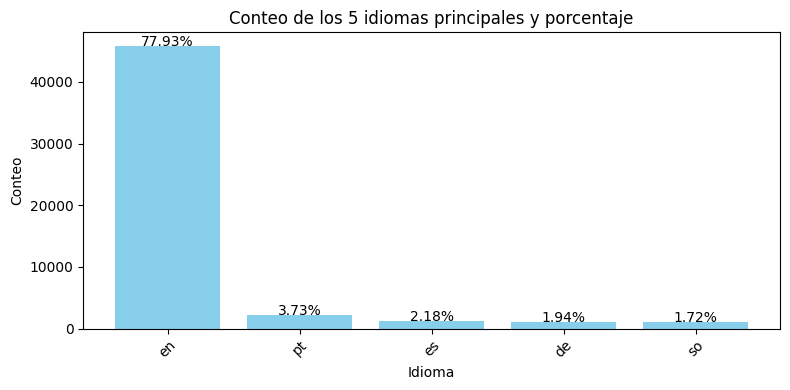

In [41]:
# Seleccionar los primeros 5 idiomas principales
top_lang_info = lang_info.head(5)

# Datos del DataFrame top_lang_info
conteo = top_lang_info['Conteo']
porcentaje = top_lang_info['Porcentaje']

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8,4))

# Graficar barras
ax.bar(top_lang_info.index, conteo, color='skyblue')

# Añadir etiquetas y título
ax.set_xlabel('Idioma')
ax.set_ylabel('Conteo')
ax.set_title('Conteo de los 5 idiomas principales y porcentaje')

# Añadir texto con los porcentajes encima de las barras
for i, val in enumerate(conteo):
    ax.text(i, val + 0.5, porcentaje[i], ha='center')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar gráfico
plt.tight_layout()
plt.show()


Con relación al gráfico y al DataFrame anterior, podemos evidenciar que el principal idioma de las reseñas es inglés, razón por la cual el análisis de sentiemiento se centrará sobre este y se eliminaran los demás. 

In [46]:
# Diccionario con los 5 principales idiomas. Nombres completos.
lang_map = {
    'en': 'English',
    'pt': 'Portugués',
    'es': 'Español',
    'de': 'Alemán',
    'so': 'Somalí',
    
}

# Aplicar el mapeo al DataFrame
df_user_reviews['idioma_completo'] = df_user_reviews['language'].map(lang_map)

# Crear un DataFrame con el resumen de idiomas
lang_info = df_user_reviews['idioma_completo'].value_counts().reset_index()
lang_info.columns = ['Idioma', 'Conteo']
lang_info['Conteo'] = lang_info['Conteo'].round(2)

# Calcular el porcentaje
lang_info['Porcentaje'] = (lang_info['Conteo'] / len(df_user_reviews)) * 100
lang_info['Porcentaje'] = lang_info['Porcentaje'].round(2)

# Guardar en un archivo CSV
#lang_info.to_csv('data/lang_info.csv', index=False)

In [47]:
df_user_reviews

,user_id,funny,item_id,recommend,review,year_posted,language,idioma_completo
5331,76561198040188061,,10,True,this game is the 1# online action game is awes...,2011,en,English
22702,maddoxx789,,10,True,GYERTEK GAMELNI MINDENKI ITT VAN AKI SZÁMIT !!...,2012,de,Alemán
35539,mixadance,1 person found this review funny,10,True,:D,2012,de,Alemán
43134,waspish,,10,True,Good Game :D,2012,so,Somalí
24137,76561198001699914,,10,True,jueguenlooooooo,2013,et,NaN
...,...,...,...,...,...,...,...,...
53065,76561198073638107,,99900,False,Elite orbs are more rarer than good presidenti...,2015,en,English
12393,Gatsukama,,99910,True,"Looks like a cute childrens game, but has more...",2011,en,English
8972,WhenWeWereYoungggg,,99910,True,Super fun.,2012,es,Español
53052,Themfgamer,,99910,False,"1/10, just a bad game overall. Dead, Boring, d...",2014,en,English


In [ ]:
# Filtramos por idioma inglés 
df_user_reviews = df_user_reviews[df_user_reviews['idioma_completo'] == 'English']

# Se elimina la columna 'idioma_completo'
df_user_reviews = df_user_reviews.drop('idioma_completo', axis=1)



In [54]:
df_user_reviews

,user_id,funny,item_id,recommend,review,year_posted,language
5331,76561198040188061,,10,True,this game is the 1# online action game is awes...,2011,en
45506,epic_doom,,10,True,The OG to CS:GO.,2013,en
7801,mayshowganmore,,10,True,THE BEST FPS GAME!!!!!,2014,en
7967,BestinTheWorldThund3r,,10,True,One of the best childhood games i have ever pl...,2014,en
8519,76561198072207162,,10,True,People still play this! Siq game,2014,en
...,...,...,...,...,...,...,...
51725,76561198068265347,,99900,True,"A fun free to play game at first, but eventual...",2015,en
53065,76561198073638107,,99900,False,Elite orbs are more rarer than good presidenti...,2015,en
12393,Gatsukama,,99910,True,"Looks like a cute childrens game, but has more...",2011,en
53052,Themfgamer,,99910,False,"1/10, just a bad game overall. Dead, Boring, d...",2014,en


#### 5. Análisis de Sentimientos 'sentiment_analysis'
Se creará la columna 'sentiment_analysis' y aplicaremos el análisis de sentimientos con NLP (Natural Language Processing) en la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna reemplaza la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos.

In [55]:
#Convertimos mayúsculas a minúsculas.
df_user_reviews.loc[:, 'review'] = df_user_reviews['review'].str.lower()

In [56]:
#Se eliminan caracteres especiales
df_user_reviews['review'] = df_user_reviews['review'].replace('[^A-Za-z0-9\s]+', '', regex=True)

In [58]:
#Se eliminan signos de puntuación
df_user_reviews.loc[:, 'review'] = df_user_reviews['review'].str.replace('[^\w\s]', '', regex=True)

In [59]:
# Análisis de sentimiento para categorizar las reseñas columna 'review' 

def analizador(df):
    # Instanciar el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()

    # Aplicar el análisis de sentimientos y asignar valores numéricos
    df['compound_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment_analysis'] = df['compound_score'].apply(lambda y: 0 if y < 0 else (1 if y == 0 else 2))

    # Conteo de reviews por score
    score_counts = df['sentiment_analysis'].value_counts()

    # Conteo de reviews en blanco
    empty_reviews_count = df['review'].isnull().sum()

    # Total de reviews
    total_reviews = len(df)

    # Calcular porcentajes
    score_percentages = (score_counts / total_reviews * 100).round(2)
    empty_reviews_percentage = (empty_reviews_count / total_reviews * 100).round(2)
     
    # Se eliminan las columnas 'review' y 'compound_score', no necesitaremos estos datos
    df.drop(['review','compound_score'], axis=1, inplace=True)  

    return df, score_counts, empty_reviews_count, score_percentages, empty_reviews_percentage

In [60]:
# Llamar a la función analizador y desempacamos el return
df_user_reviews, score_counts, empty_reviews_count, score_percentages, empty_reviews_percentage = analizador(df_user_reviews)

# Crear un nuevo DataFrame con el conteo y porcentaje
summarize = pd.DataFrame({
    'Conteo': score_counts,
    'Porcentaje': score_percentages.round(2).astype(str) + '%'
})

In [61]:
# Ordenar el df de mayor a menor
summarize = summarize.sort_values(by='Conteo', ascending=False)

In [62]:
summarize

,Conteo,Porcentaje
sentiment_analysis,,
2,32410,70.83%
0,8538,18.66%
1,4807,10.51%


In [63]:
# Se elimina la columna 'language'
df_user_reviews = df_user_reviews.drop('language', axis=1)
df_user_reviews

,user_id,funny,item_id,recommend,year_posted,sentiment_analysis
5331,76561198040188061,,10,True,2011,2
45506,epic_doom,,10,True,2013,1
7801,mayshowganmore,,10,True,2014,2
7967,BestinTheWorldThund3r,,10,True,2014,2
8519,76561198072207162,,10,True,2014,2
...,...,...,...,...,...,...
51725,76561198068265347,,99900,True,2015,2
53065,76561198073638107,,99900,False,2015,2
12393,Gatsukama,,99910,True,2011,2
53052,Themfgamer,,99910,False,2014,0



Al evaluar los distintos enfoques para el análisis de sentimientos se tuvieron en cuenta los siguientes aspectos: facilidad en la implementación, eficiencia computacional y precisión relativa sobre el resultado. Por esta razón decidí usar la librería NLTK (Natural Language Toolkit) con el modelo VADER.

### 4. Guardar el dataset limpio

In [66]:
# Los archivos se almacenan en local 
#df_user_reviews.to_csv(r'data\user_reviews_cln.csv', index=False)